<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/lab/sidpatel_autoencoder_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
from keras.datasets import mnist 

In [3]:
#runtime to GPU

In [4]:
len(mnist.load_data())

11501568/11490434 [==============================] - 0s 0us/step


2

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
nimg, img_row, img_col = x_train.shape

In [8]:
import pylab as pl

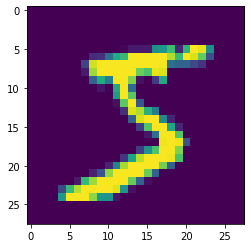

In [9]:
pl.imshow(x_train[0])

In [10]:
x_train.max()

255

In [11]:
x_train.dtype

dtype('uint8')

In [12]:
x_train = (x_train.astype(float) / 255)

In [13]:
x_test = (x_test.astype(float) / 255)

In [14]:
x_train = x_train.reshape(nimg, img_row*img_col)

In [15]:
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)

In [16]:
y_train = x_train.copy()

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model_digits = Sequential()

In [19]:
model_digits.add(Dense(128, activation="relu", input_dim=img_col*img_row))
model_digits.add(Dense(64, activation="relu"))
model_digits.add(Dense(128, activation="relu"))
model_digits.add(Dense(img_col*img_row, activation="linear"))



In [20]:
model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [21]:
model_digits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_digits.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.1161 - val_loss: 0.1174
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1149 - val_loss: 0.1163
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1139 - val_loss: 0.1154
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1130 - val_loss: 0.1146
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1123 - val_loss: 0.1139
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1117 - val_loss: 0.1133
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1111 - val_loss: 0.1127
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1122
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1101 - val_loss: 0.1117
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1097 - val_loss: 0.1113